In [1]:
# 参考
# From the course: Bayesin Machine Learning in Python: A/B Testing
# https://www.udemy.com/bayesian-machine-learning-in-python-ab-testing
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
NUM_TRIALS = 100000
BANDIT_PROBABILITIES = [0.67, 0.86, 0.971, 0.8, 0.5, 0.95]

In [3]:
class Bandit:
    def __init__(self, p, initial):
        self.p = p
        self.p_estimate = initial
        self.N = 1
    
    def pull(self):
        return np.random.random() < self.p
    
    def update(self, x):
        self.N += 1
        self.p_estimate = ((self.N - 1) * self.p_estimate + x) / self.N
        
def experiment(INT_VAL):
    bandits = [Bandit(p, INT_VAL) for p in BANDIT_PROBABILITIES]
    
    rewards = np.zeros(NUM_TRIALS)
    
    
    for i in range(NUM_TRIALS):

        j = np.argmax([b.p_estimate for b in bandits])

        # pull the arm for the bandit with the largest sample
        x = bandits[j].pull()

        # update rewards log
        rewards[i] = x

        # update the distribution for the bandit whose arm we just pulled
        bandits[j].update(x)
        


    ## print mean estimates for each bandit
    #print('~'*10, 'print estimates', '~'*10)
    #for b in bandits:
    #    print("mean estimate:", b.p_estimate, 'actual prob', b.p)
    #    
    ## print total reward
    #print('~'*10, 'print total reward', '~'*10)
    #print("total reward earned:", rewards.sum())
    #print("overall win rate:", rewards.sum() / NUM_TRIALS)
  #
    ## plot the results
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
    #plt.plot(win_rates)
    #plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
    #plt.xscale('log')
    #plt.show()
    
    return win_rates

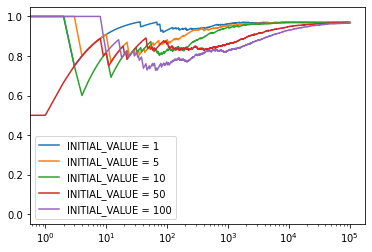

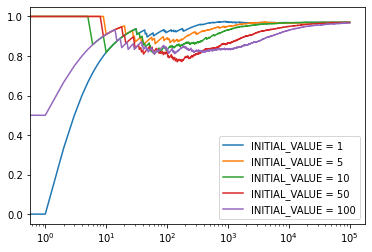

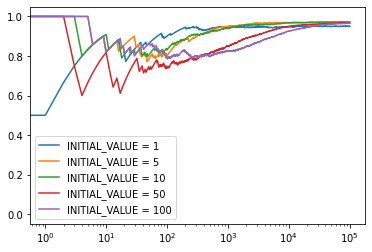

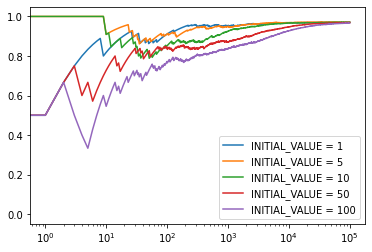

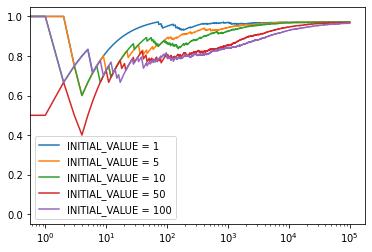

In [4]:
for i in range(5):

    e_1 = experiment(1)
    e_5 = experiment(5)
    e_10 = experiment(10)
    e_50 = experiment(50)
    e_100 = experiment(100)

    plt.plot(e_1, label='INITIAL_VALUE = 1')
    plt.plot(e_5, label='INITIAL_VALUE = 5')
    plt.plot(e_10, label='INITIAL_VALUE = 10')
    plt.plot(e_50, label='INITIAL_VALUE = 50')
    plt.plot(e_100, label='INITIAL_VALUE = 100')
    plt.legend()
    plt.xscale('log')
    plt.show()

In [5]:
# Initial valueが小さい方が真の値に下がるまで時間がかからないと主張
# -> 概ねその通り